# Diretórios e Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy pandas seaborn matplotlib scikit-learn xgboost joblib --quiet

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib

# Dataframe

In [4]:
bootcamp_train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp CDIA/model/data/real_normalized_data.csv')
bootcamp_train_df.head()

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,...,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,tipo_do_aço_A300,tipo_do_aço_A400,targets
0,0.010088,0.096019,0.005745,0.019629,0.002725,0.019639,0.021127,0.003126,0.375000,0.241623,...,0.302568,0.315567,0.388761,0.403242,0.537584,0.206683,0.078776,0,1.0,7.0
1,0.073431,0.315574,0.040413,0.138076,0.005411,0.005499,0.026761,0.000588,0.414773,0.238095,...,0.124762,0.196206,0.251801,0.359553,0.531924,0.020485,0.072266,0,1.0,8.0
2,0.002686,0.123536,0.061259,0.209306,0.248529,0.214454,0.185915,0.215403,0.278409,0.231041,...,0.833310,0.700299,0.643120,0.173124,0.351036,1.000000,0.024740,0,1.0,3.0
3,0.008450,0.088993,0.001807,0.006174,0.010665,0.029065,0.033803,0.010999,0.329545,0.238095,...,0.458638,0.413328,0.460627,0.341354,0.472821,0.796635,0.072266,0,1.0,3.0
4,0.028560,0.255855,0.112279,0.040608,0.002251,0.011783,0.021127,0.001950,0.221591,0.227513,...,0.281659,0.172082,0.443264,0.835084,0.332973,0.093957,0.055990,0,0.0,8.0


In [5]:
X = bootcamp_train_df.drop('targets', axis=1)
y = bootcamp_train_df['targets']

# Divisão de subconjuntos

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.80)

# Treinamento do Modelo

In [7]:
params = {
    'estimator__booster': ['gbtree', 'dart'],
    'estimator__eta': np.arange(0, 1.1, 0.1),
    'estimator__gamma': np.arange(0, 11),
    'estimator__max_depth': np.arange(0, 11),
    'estimator__sampling_method': ['uniform'],
    'estimator__tree_method': ['exact', 'approx', 'hist'],
    'estimator__lambda': np.arange(0, 11),
    'estimator__alpha': np.arange(0, 11),
    'estimator__max_leaves': np.arange(1, 101),
    'estimator__objective': ['multi:softmax', 'multi:softprob'],
    'estimator__eval_metric': ['merror', 'mlogloss']
}

classifier = XGBClassifier(num_class=5)
one_vs_rest = OneVsRestClassifier(estimator=classifier)

randomized_estimator = RandomizedSearchCV(
    estimator=one_vs_rest,
    param_distributions=params,
    scoring='accuracy',
    return_train_score=True,
    n_iter=20
)

In [8]:
randomized_estimator.fit(x_train, y_train)

RandomizedSearchCV(estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         gamma=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         interaction_const...
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]),
                                        'estimator__objective': ['multi:softmax',
                                                                 'multi:softprob'],
                                        'estimator__sampling_method': ['uniform'],
                                        'estimator__tree_method': ['exact',
                                                                   'approx',
                                                                   'hist']},
                   return_train_score=True, scoring='accuracy')

In [9]:
predict = randomized_estimator.predict(x_test)

In [10]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         3.0       0.94      0.96      0.95       129
         5.0       0.50      0.37      0.42        19
         6.0       0.53      0.52      0.52       161
         7.0       0.59      0.67      0.63       234
         8.0       0.77      0.60      0.67       127

    accuracy                           0.67       670
   macro avg       0.66      0.62      0.64       670
weighted avg       0.67      0.67      0.67       670



In [11]:
metrics = confusion_matrix(y_test, predict)

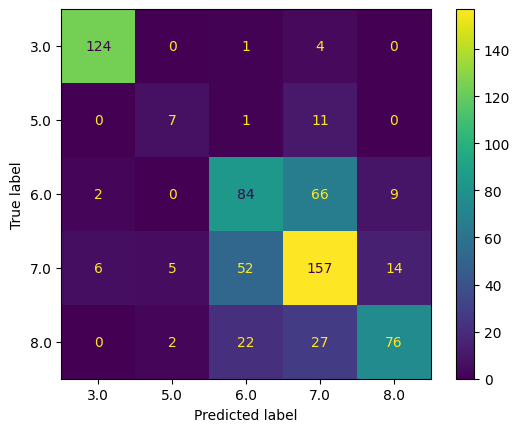

In [13]:
ConfusionMatrixDisplay(confusion_matrix=metrics,
                              display_labels=randomized_estimator.classes_).plot()

In [14]:
randomized_estimator.predict_proba(x_test)

array([[0.9217878 , 0.00258798, 0.00510615, 0.06663822, 0.00387988],
       [0.9496415 , 0.00153317, 0.00348994, 0.01257759, 0.03275781],
       [0.37506482, 0.00174152, 0.02025753, 0.59529084, 0.00764529],
       ...,
       [0.0113436 , 0.00539589, 0.46042448, 0.28144214, 0.2413939 ],
       [0.96780884, 0.00144336, 0.01876156, 0.00443003, 0.00755621],
       [0.00316382, 0.00623038, 0.20884073, 0.7136254 , 0.06813969]],
      dtype=float32)

In [16]:
joblib.dump(randomized_estimator.best_estimator_, 'xgb67.pkl')

['xgb67.pkl']